# Heart Disease Prediction using WEB Application

## Overview
In this project, I will go through these steps in order to build a heart disease classifier. To build the heart disease classifier by using [UCI heart disease](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) dataset. 


### Dataset

The dataset has 14 attributes:
 
* **age:** age in years.

* **sex:** sex (1 = male; 0 = female).

* **cp:** chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic).

* **trestbps:** resting blood pressure in mm Hg on admission to the hospital.

* **chol:** serum cholestoral in mg/dl.

* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

* **restecg:** resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy).

* **thalach:** maximum heart rate achieved.

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest.

* **slope:** the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping).

* **ca:** number of major vessels (0-3) colored by flourosopy.

* **thal:** thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

* **target:** heart disease (1 = no, 2 = yes)


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

## Data Preparation and Data Exploration

In [2]:
heart = pd.read_csv("data.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
heart.shape

(270, 14)

In [4]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB
None


In [5]:
heart.isnull().values.any()

False

In [6]:
heart['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

In [7]:
heart['target'].value_counts()/heart.shape[0]*100

1    55.555556
2    44.444444
Name: target, dtype: float64

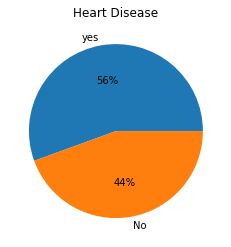

In [8]:
labels = ['yes', 'No']
values = heart['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

## Attributes Correlation

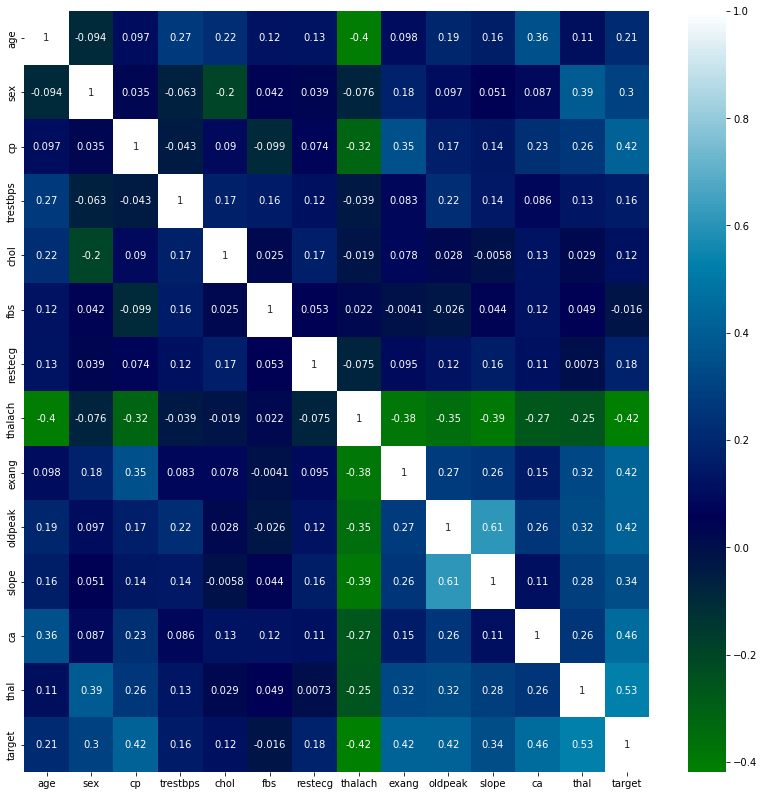

In [9]:
plt.figure(figsize=(14, 14))
sns.heatmap(heart.corr(), annot = True, cmap = "ocean")
plt.show()

### NOTE:
From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly.  We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

We can see also, there are a relation between the following attributes:

* The number of major vessels (0-3) colored by flourosopy (ca) and the age.
* ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
* The chest pain type (cp), exercise induced angina (exang).
* maximum heart rate (thalch) and the age.


 Next,I am going to explore each attribute and then explore the found correlations. 

## Distribution of features

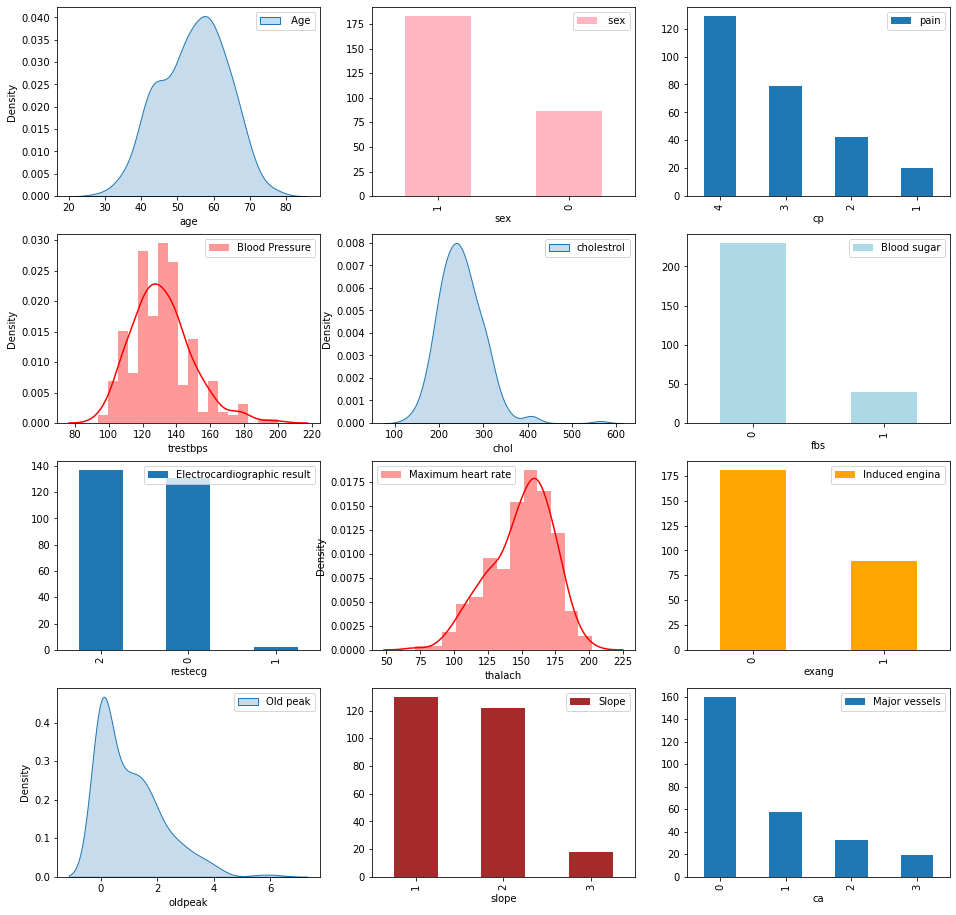

In [10]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(heart['age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
heart['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
heart['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(heart['trestbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(heart['chol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
heart['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
heart['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(heart['thalach'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
heart['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(heart['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
heart['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
heart['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

## Age Exploration

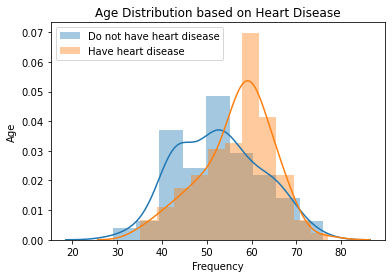

In [11]:
sns.distplot(heart[heart['target'] == 1]['age'], label='Do not have heart disease')
sns.distplot(heart[heart['target'] == 2]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [12]:
print('Min age of people who do not have heart disease: ', min(heart[heart['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(heart[heart['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', heart[heart['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


In [13]:
print('Min age of people who have heart disease: ', min(heart[heart['target'] == 2]['age']))
print('Max age of people who have heart disease: ', max(heart[heart['target'] == 2]['age']))
print('Average age of people who have heart disease: ', heart[heart['target'] == 2]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.59166666666667


### Note: 
From the above finding's it can said that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.

## GENDER EXPLORATION

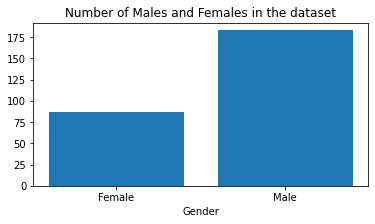

In [14]:
F = heart[heart['sex'] == 0].count()['target']
M = heart[heart['sex'] == 1].count()['target']
figure, ax = plt.subplots(figsize = (6, 3))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

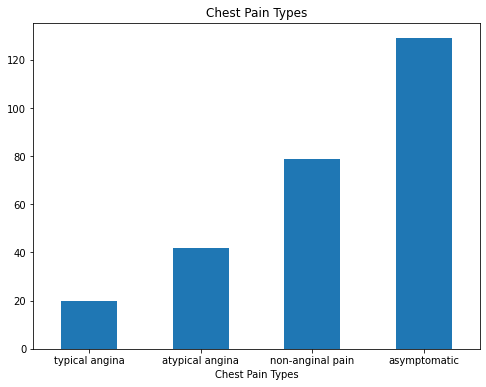

In [15]:
heart.groupby(heart['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

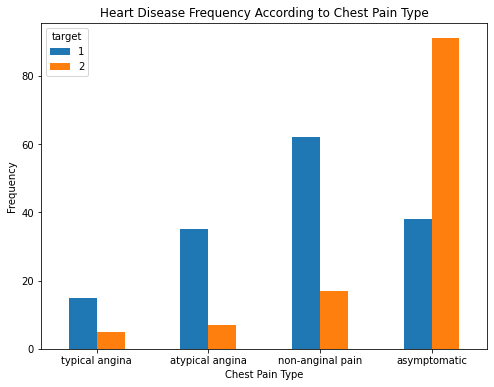

In [16]:
pd.crosstab(heart.cp,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Note:
From the above finding's, we can say that people with heart diseases have asymptomatic chest pain

## Blood Pressure Exploration

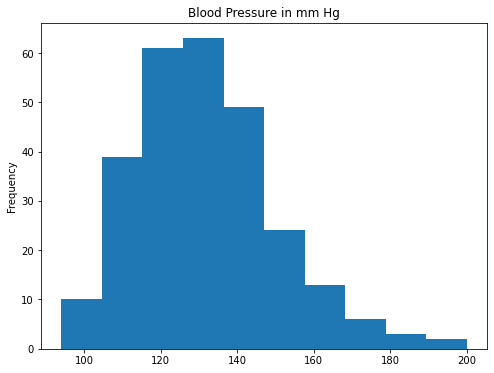

In [17]:
heart['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

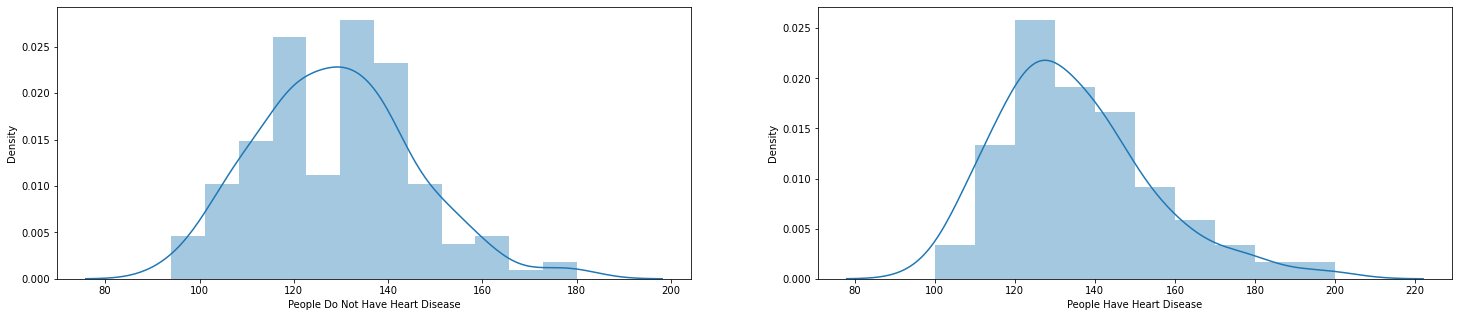

In [18]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart[heart['target'] == 1]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart[heart['target'] == 2]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [19]:
print('Min blood pressure of people who do not have heart disease: ', min(heart[heart['target'] == 1]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart[heart['target'] == 1]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart[heart['target'] == 1]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  128.86666666666667


In [20]:
print('Min blood pressure of people who have heart disease: ', min(heart[heart['target'] == 2]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart[heart['target'] == 2]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart[heart['target'] == 2]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.44166666666666


## Cholestoral Exploration

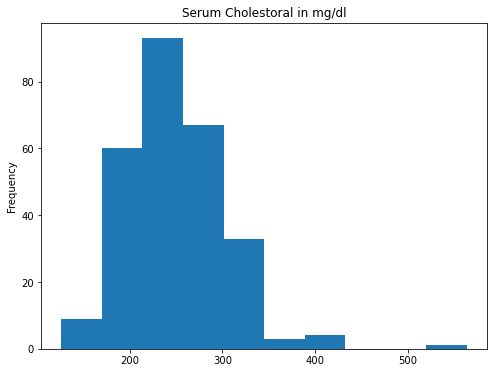

In [21]:
heart['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

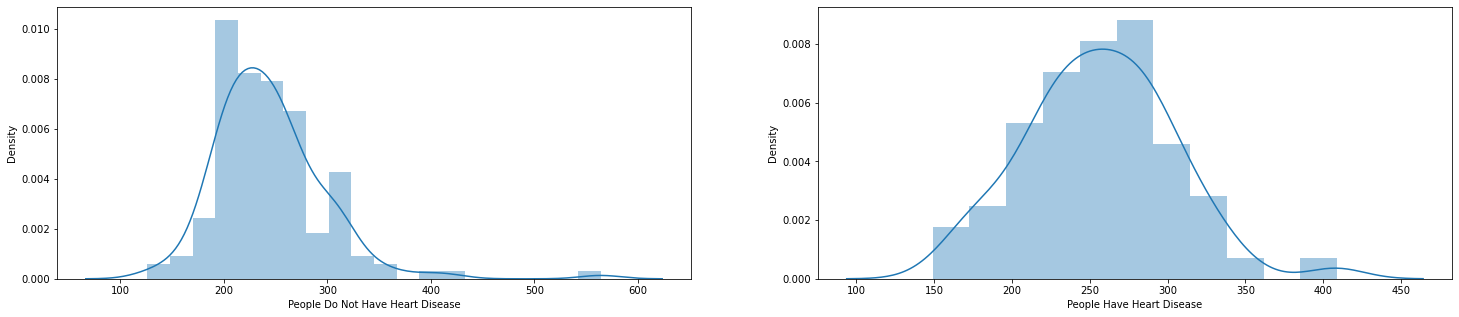

In [22]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart[heart['target'] == 1]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart[heart['target'] == 2]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [23]:
print('Min cholestoral of people who do not have heart disease: ', min(heart[heart['target'] == 1]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart[heart['target'] == 1]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart[heart['target'] == 1]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  244.21333333333334


In [24]:
print('Min cholestoral of people who have heart disease: ', min(heart[heart['target'] == 2]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart[heart['target'] == 2]['chol']))
print('Average cholestorale of people who have heart disease: ', heart[heart['target'] == 2]['chol'].mean())

Min cholestoral of people who have heart disease:  149
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  256.46666666666664


## Fasting Blood Sugar Exploration

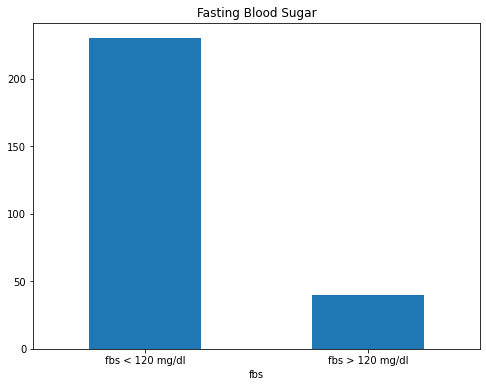

In [25]:
heart.groupby(heart['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

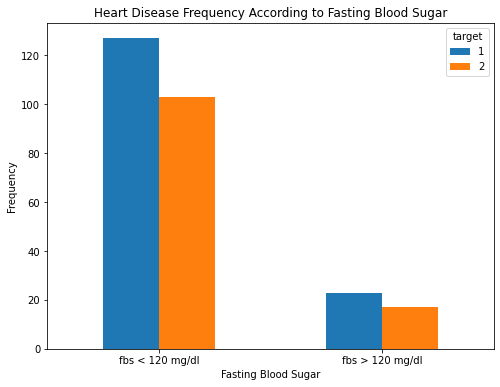

In [26]:
pd.crosstab(heart.fbs,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

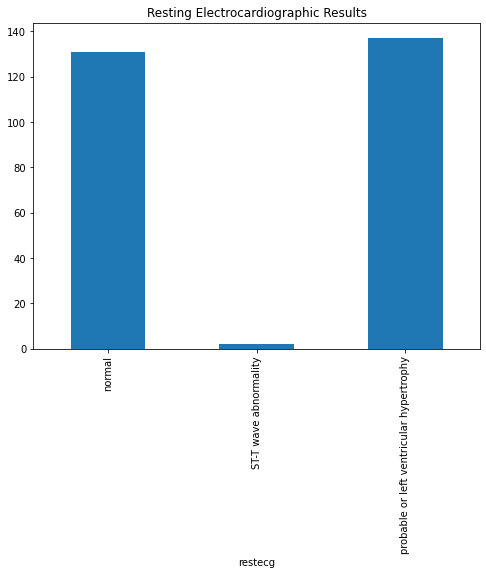

In [27]:
heart.groupby(heart['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

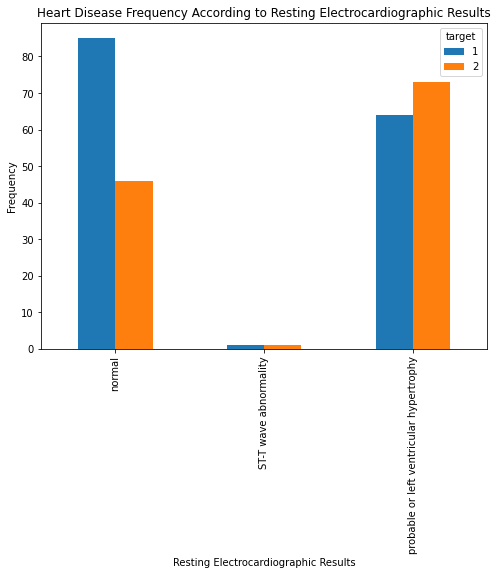

In [28]:
pd.crosstab(heart.restecg,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

## Note:
People who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.

## Maximum Heart Rate Exploration

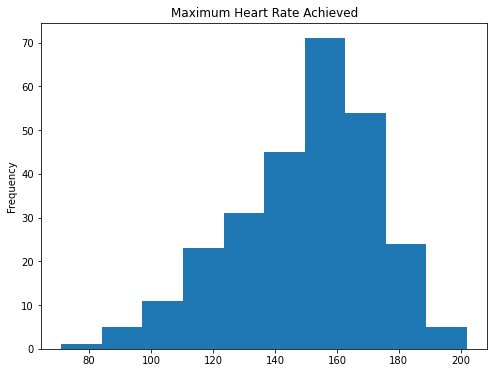

In [29]:
heart['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

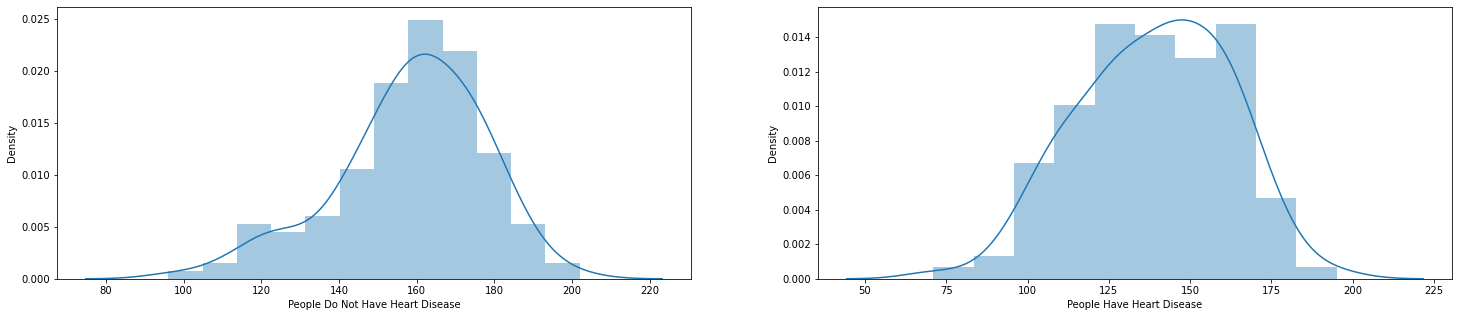

In [30]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart[heart['target'] == 1]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart[heart['target'] == 2]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [31]:
print('Min resting blood pressure of people who do not have heart disease: ', min(heart[heart['target'] == 1]['thalach']))
print('Max resting blood pressure of people who do not have heart disease: ', max(heart[heart['target'] == 1]['thalach']))
print('Average resting blood pressure of people who do not have heart disease: ', heart[heart['target'] == 1]['thalach'].mean())

Min resting blood pressure of people who do not have heart disease:  96
Max resting blood pressure of people who do not have heart disease:  202
Average resting blood pressure of people who do not have heart disease:  158.33333333333334


In [32]:
print('Min maximum heart rate  of people who have heart disease: ', min(heart[heart['target'] == 2]['thalach']))
print('Max maximum heart rate people who have heart disease: ', max(heart[heart['target'] == 2]['thalach']))
print('Average maximum heart rate of people who have heart disease: ', heart[heart['target'] == 2]['thalach'].mean())

Min maximum heart rate  of people who have heart disease:  71
Max maximum heart rate people who have heart disease:  195
Average maximum heart rate of people who have heart disease:  138.85833333333332


### Note:
The people who have heigh heart rate greater than 150 are more likely to have heart disease.

## Exercise Induced Angina Exploration

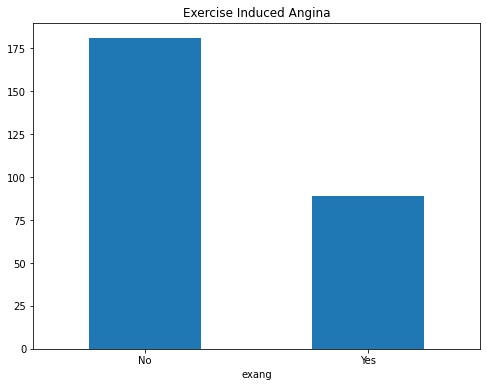

In [33]:
heart.groupby(heart['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

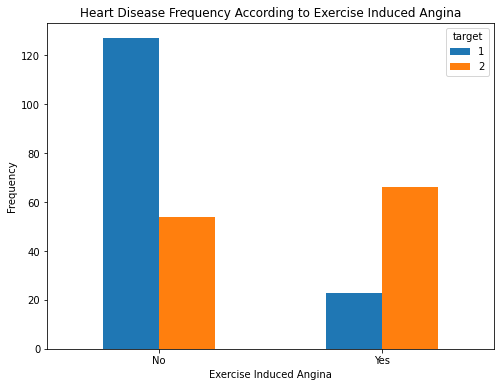

In [34]:
pd.crosstab(heart.exang,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Note:
The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

## ST Depression Exploration

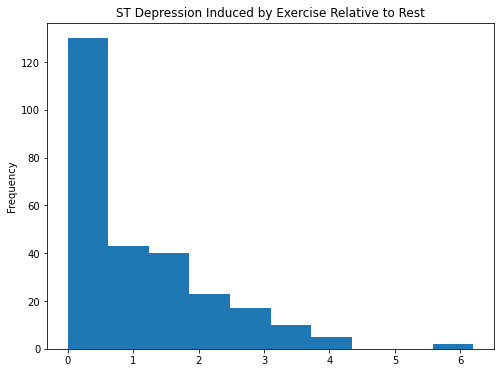

In [35]:
heart['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

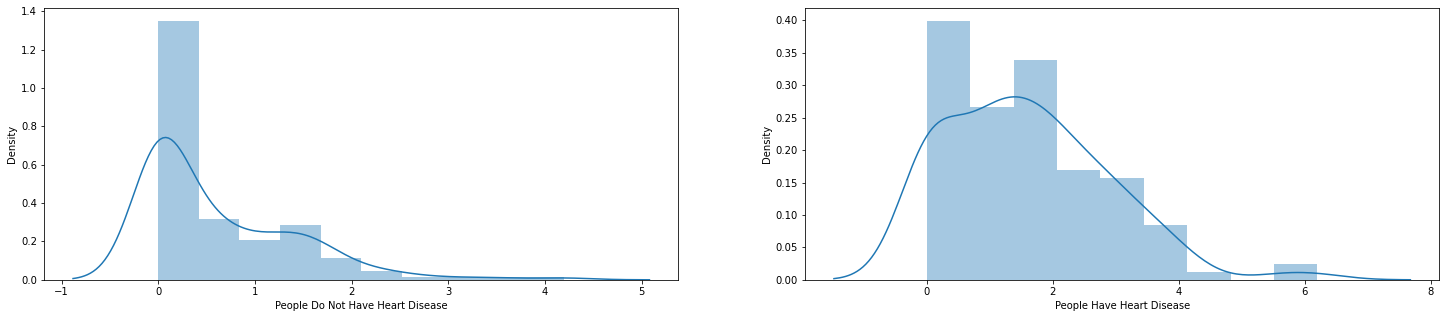

In [36]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart[heart['target'] == 1]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart[heart['target'] == 2]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [37]:
print('Min ST depression of people who do not have heart disease: ', min(heart[heart['target'] == 1]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(heart[heart['target'] == 1]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', heart[heart['target'] == 1]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.2
Average ST depression of people who do not have heart disease:  0.6226666666666668


In [38]:
print('Min ST depression of people who have heart disease: ', min(heart[heart['target'] == 2]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(heart[heart['target'] == 2]['oldpeak']))
print('Average ST depression of people not have heart disease: ', heart[heart['target'] == 2]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  6.2
Average ST depression of people not have heart disease:  1.584166666666667


### Note:
The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5.

## Slope Exploration

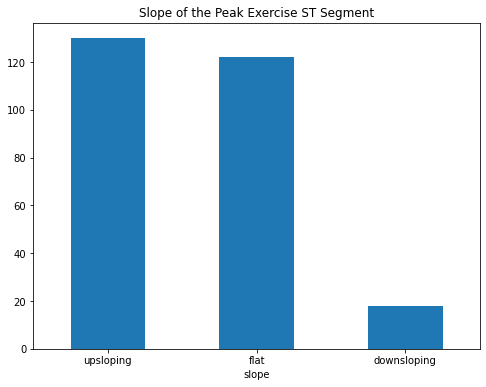

In [39]:
heart.groupby(heart['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

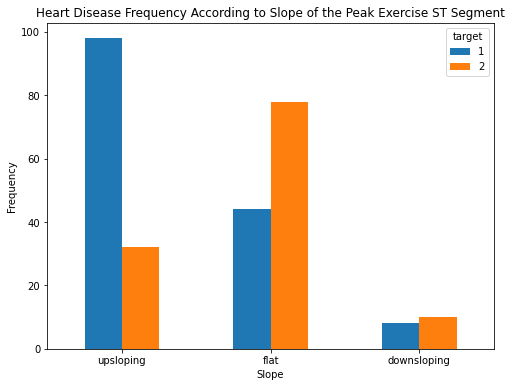

In [40]:
pd.crosstab(heart.slope,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Note:
As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

## Major Vessels Exploration

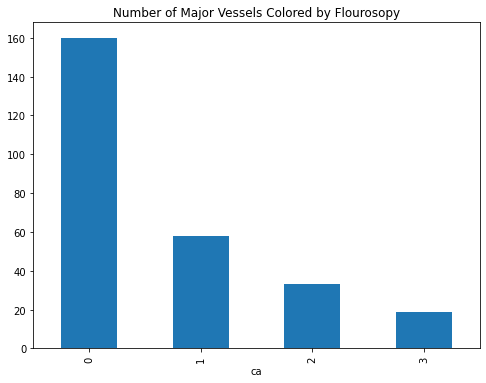

In [41]:
heart.groupby(heart['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

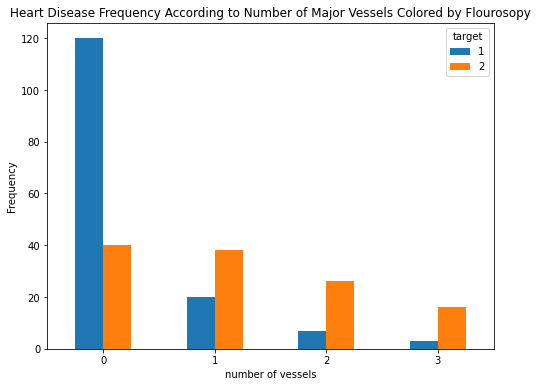

In [42]:
pd.crosstab(heart.ca,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Note:
People who do not have heart disease usually do not have major vessels colored by flourosopy.

## Thalassemia Exploration

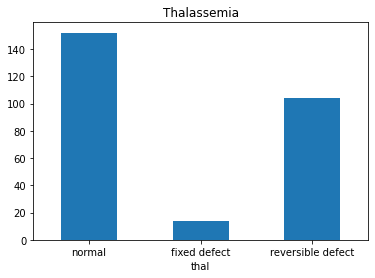

In [43]:
# Display thalassemia in bar chart
heart.groupby(heart['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

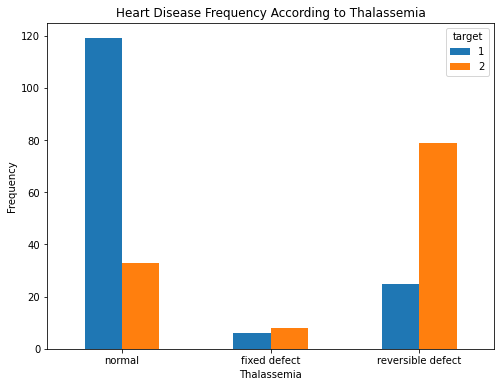

In [44]:
pd.crosstab(heart.thal,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Note:
As it is clear, the people with reversible defect are likely to have heart disease.

### The correlation between heart disease, cp and exang

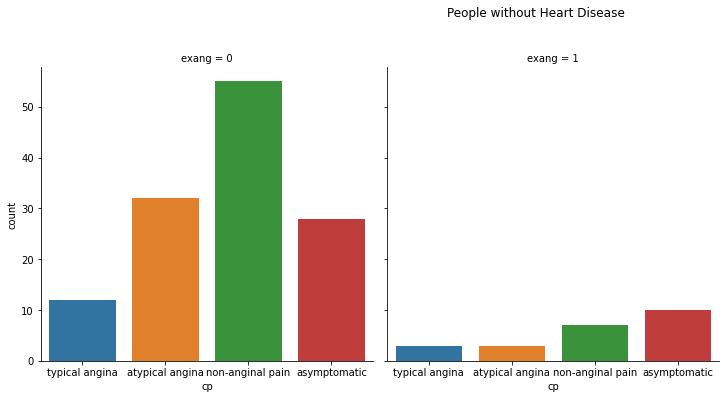

In [45]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = heart[heart['target'] == 1], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People without Heart Disease', y = 1.1)
plt.show()

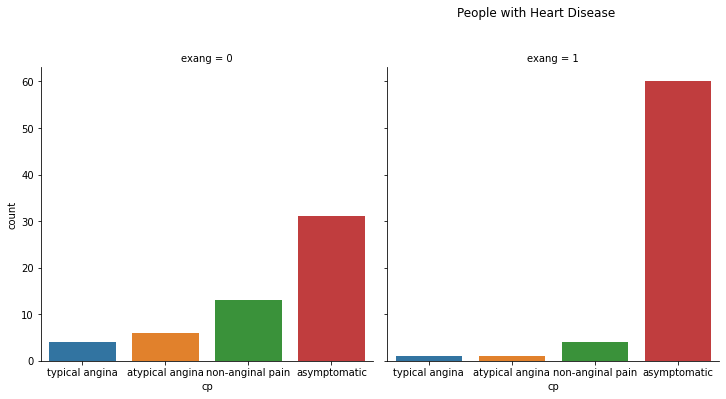

In [46]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = heart[heart['target'] == 2], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People with Heart Disease', y = 1.1)
plt.show()

**Note:**
People who have exercise induced angina, they usually suffer from asymptomatic chest pain. Moreover, the people who do not have exercise induced angina, they usually suffer from asymptomatic chest pain if they have heart disease.

### The correlation between oldpeak, slope and target

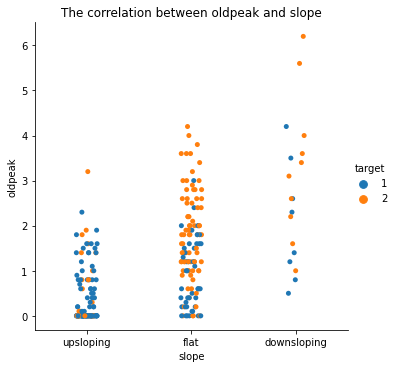

In [47]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = heart)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

#### Note:
Flat slope and downsloping have higher values of ST depression.

## The correlation between ca and age

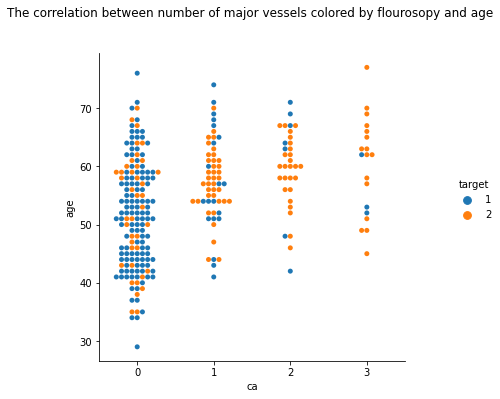

In [48]:
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = heart, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

#### Note:
Older people are more likely to have vessels colored by flourosopy.

## The correlation between age and thalach

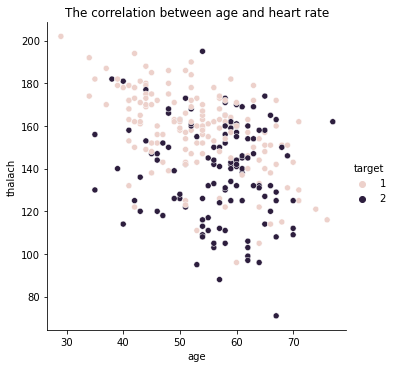

In [49]:
sns.relplot(x = 'age', y = 'thalach', data = heart, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

#### Note:
The older the person, the lower the heart rate. Also, the people with lower heart rate are likely to have heart disease.

# Modeling 

## Preparing the data for Machine Learning

In [50]:
# Initialize data and target
target = heart['target']
features = heart.drop(['target'], axis = 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state = 0)

In [52]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):

    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [57]:
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
lr = LogisticRegression(random_state = 1)
dt = DecisionTreeClassifier(random_state  = 1)
# Fit and evaluate models
results = {}
for cls in [sv, rf, ab ,lr,dt]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

In [58]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           1       0.70      0.82      0.76        17
           2       0.57      0.40      0.47        10

    accuracy                           0.67        27
   macro avg       0.64      0.61      0.61        27
weighted avg       0.65      0.67      0.65        27


confusion_matrix :
[[14  3]
 [ 6  4]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        17
           2       0.80      0.80      0.80        10

    accuracy                           0.85        27
   macro avg       0.84      0.84      0.84        27
weighted avg       0.85      0.85      0.85        27


confusion_matrix :
[[15  2]
 [ 2  8]]

-----

AdaBoostClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.6

Feature: age, Score: 0.07676
Feature: sex, Score: 0.02823
Feature: cp, Score: 0.13511
Feature: trestbps, Score: 0.08013
Feature: chol, Score: 0.08266
Feature: fbs, Score: 0.00923
Feature: restecg, Score: 0.02133
Feature: thalach, Score: 0.12925
Feature: exang, Score: 0.04739
Feature: oldpeak, Score: 0.12202
Feature: slope, Score: 0.04808
Feature: ca, Score: 0.11084
Feature: thal, Score: 0.10896


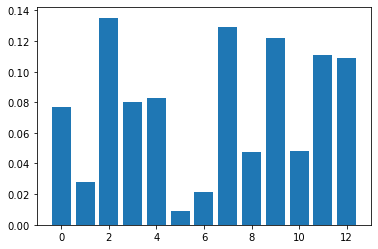

In [55]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Save Model

In [56]:
with open('bhavan.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Result

As a Result, in this note book, I had used a heart disease dataset to build a classification model. I started with data exploration, then data preperation. After that, I built five models for heart disease classification. Finally, I selected random forest as the best model and saved it to use it later for web application.